In [1]:
import sys
print(sys.executable)
!conda info | grep 'active env'

/sc/arion/work/massen06/.conda/envs/qc/bin/python3.8
     active environment : qc
    active env location : /sc/arion/work/massen06/.conda/envs/qc


In [23]:
import os
import copy
import pge
import anndata as ad
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Mouse Living Brain Visualization
Nicolas Masse, Donghoon Lee  
July 2023

In [26]:
anndata_fn = "/sc/arion/work/massen06/living_brain1/anndata/mouse_post_qc.h5ad"

In [27]:
adata = sc.read_h5ad(anndata_fn)

## Visualizing the data with UMAP at differen resolutions

In [29]:
sc.pp.neighbors(adata, n_pcs=30)
sc.tl.umap(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [30]:
sc.tl.leiden(adata)

In [31]:
sc.tl.leiden(adata, key_added="leiden_res0_25", resolution=0.25)
sc.tl.leiden(adata, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(adata, key_added="leiden_res1", resolution=1.0)

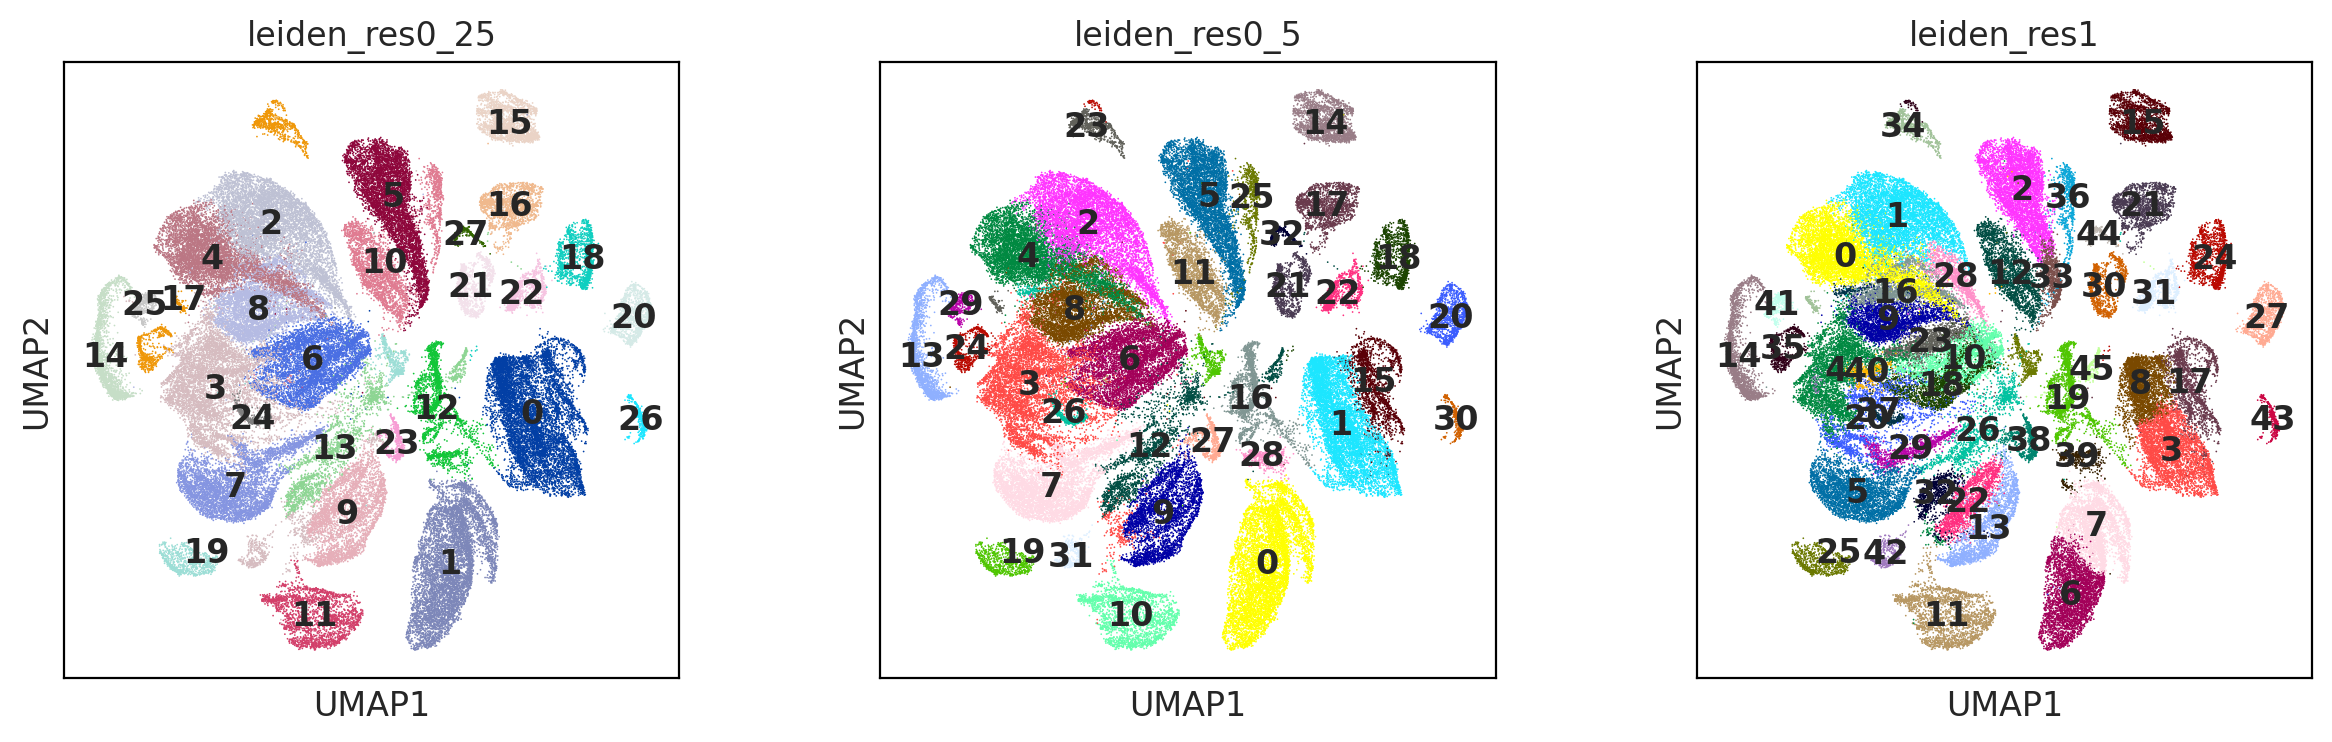

In [32]:
sc.pl.umap(
    adata,
    color=["leiden_res0_25", "leiden_res0_5", "leiden_res1"],
    legend_loc="on data",
)

## Visualizing the data seperated by cDNA preparation date

cDNA preparation date: 06022023


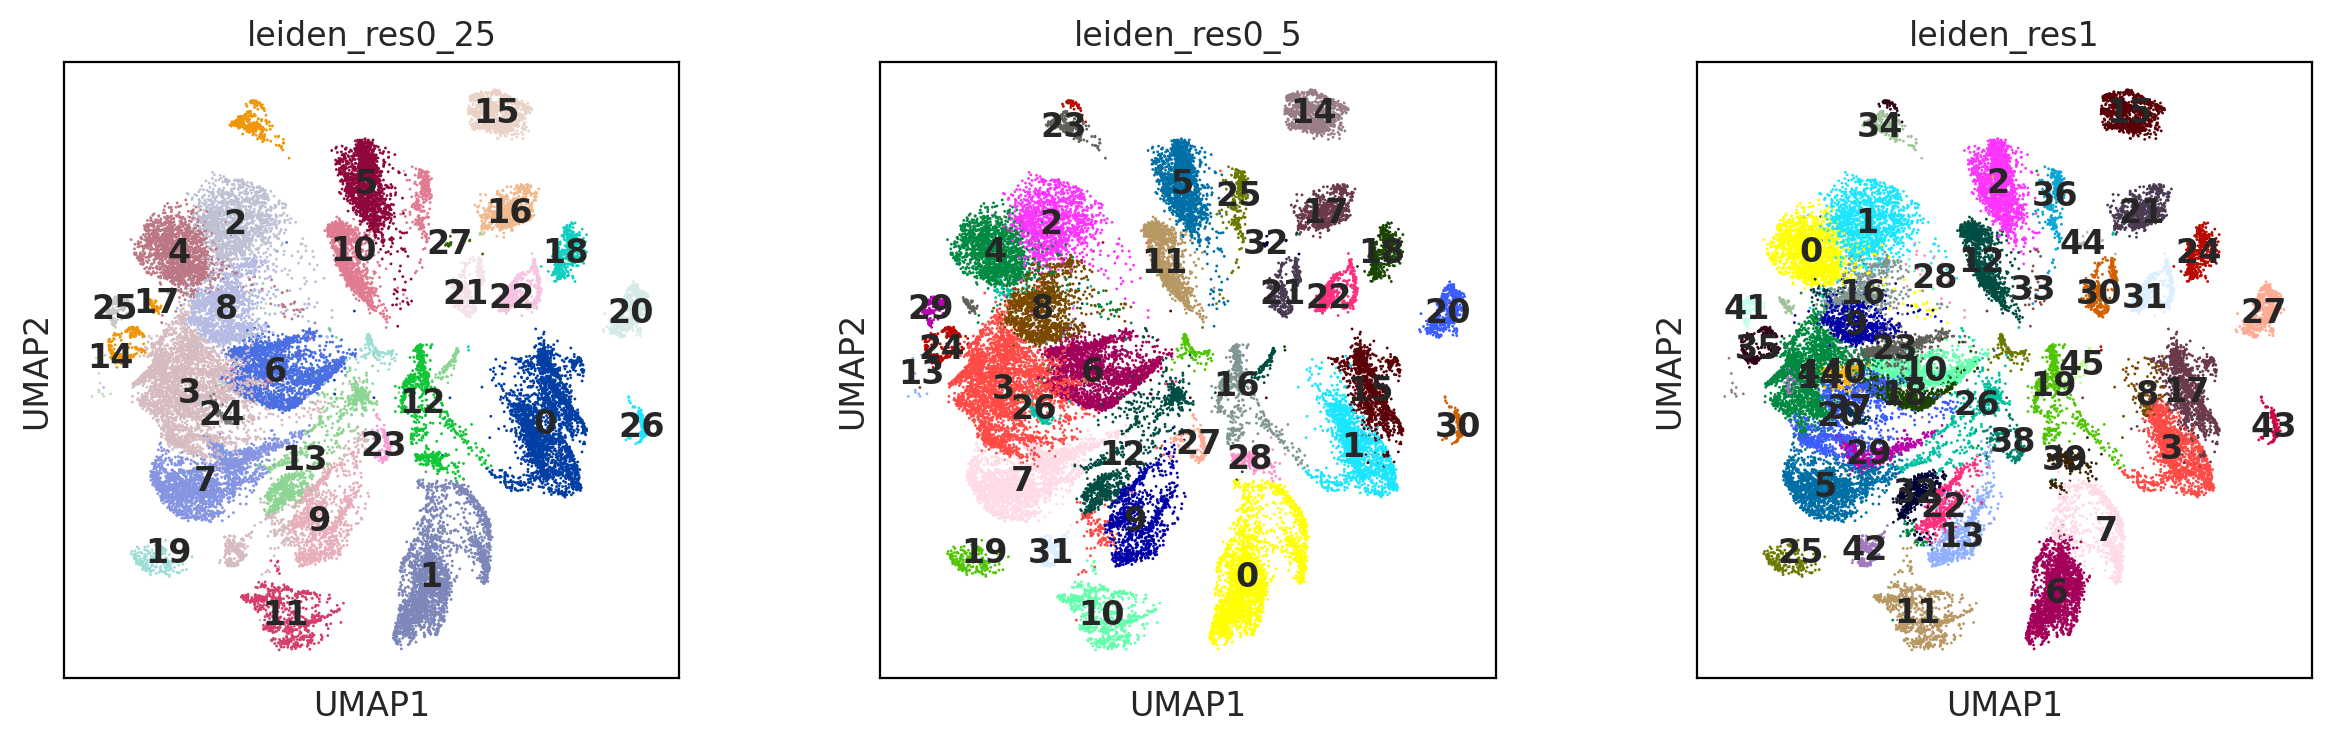



cDNA preparation date: 06062023


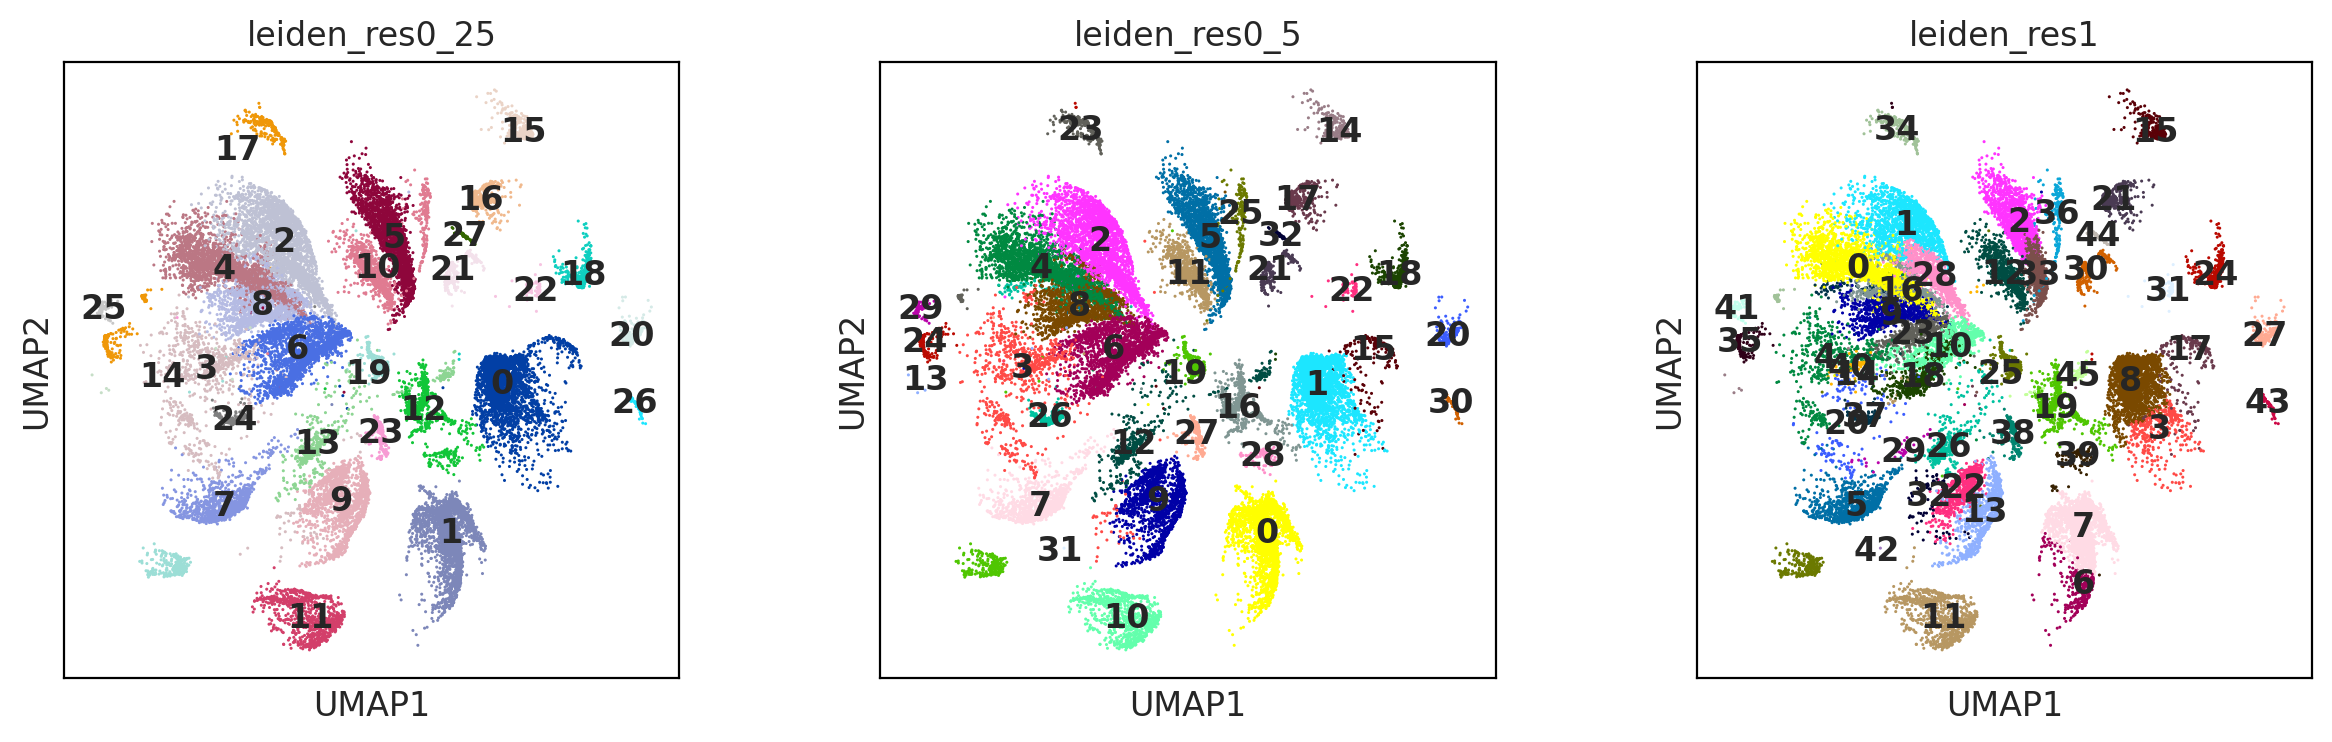



cDNA preparation date: 06072023


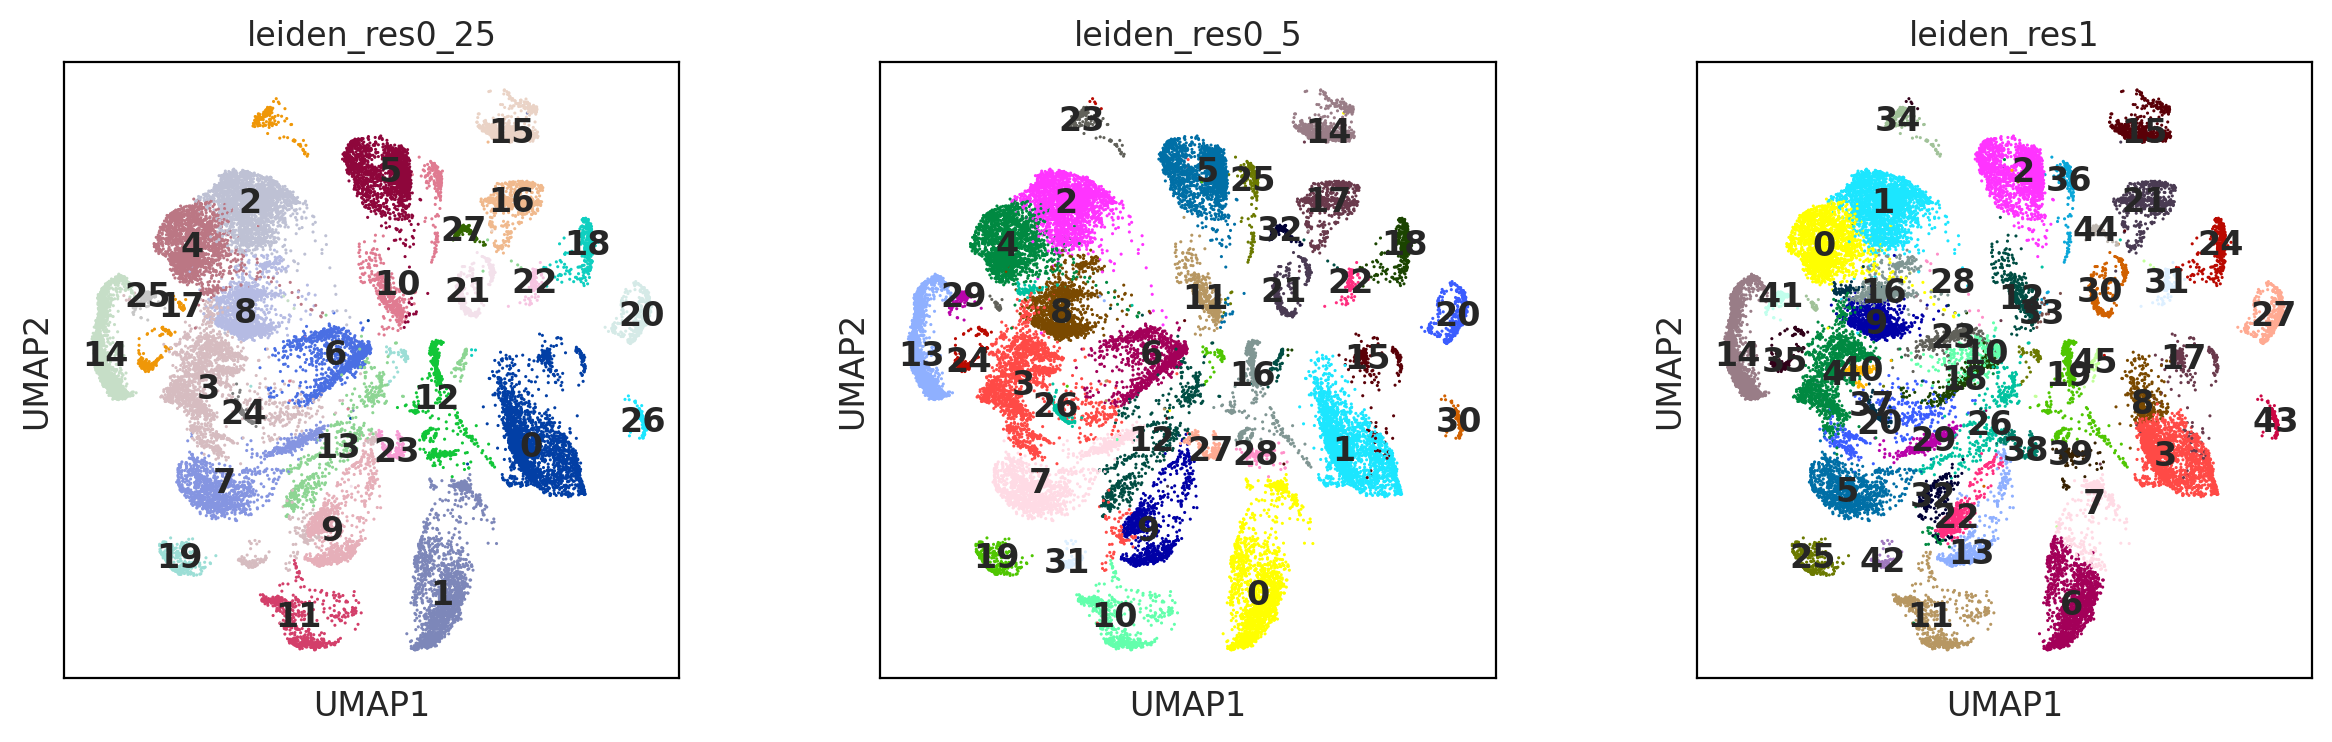

In [33]:
for prep_date in adata.obs.stage_2_date.unique():
    print(f"cDNA preparation date: {prep_date}")
    sc.pl.umap(
        adata[adata.obs.stage_2_date.isin([prep_date])],
        color=["leiden_res0_25", "leiden_res0_5", "leiden_res1"],
        legend_loc="on data",
    )
    print()
    print()
    plt.show()

/sc/arion/work/massen06/.conda/envs/qc/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/sc/arion/work/massen06/.conda/envs/qc/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/sc/arion/work/massen06/.conda/envs/qc/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


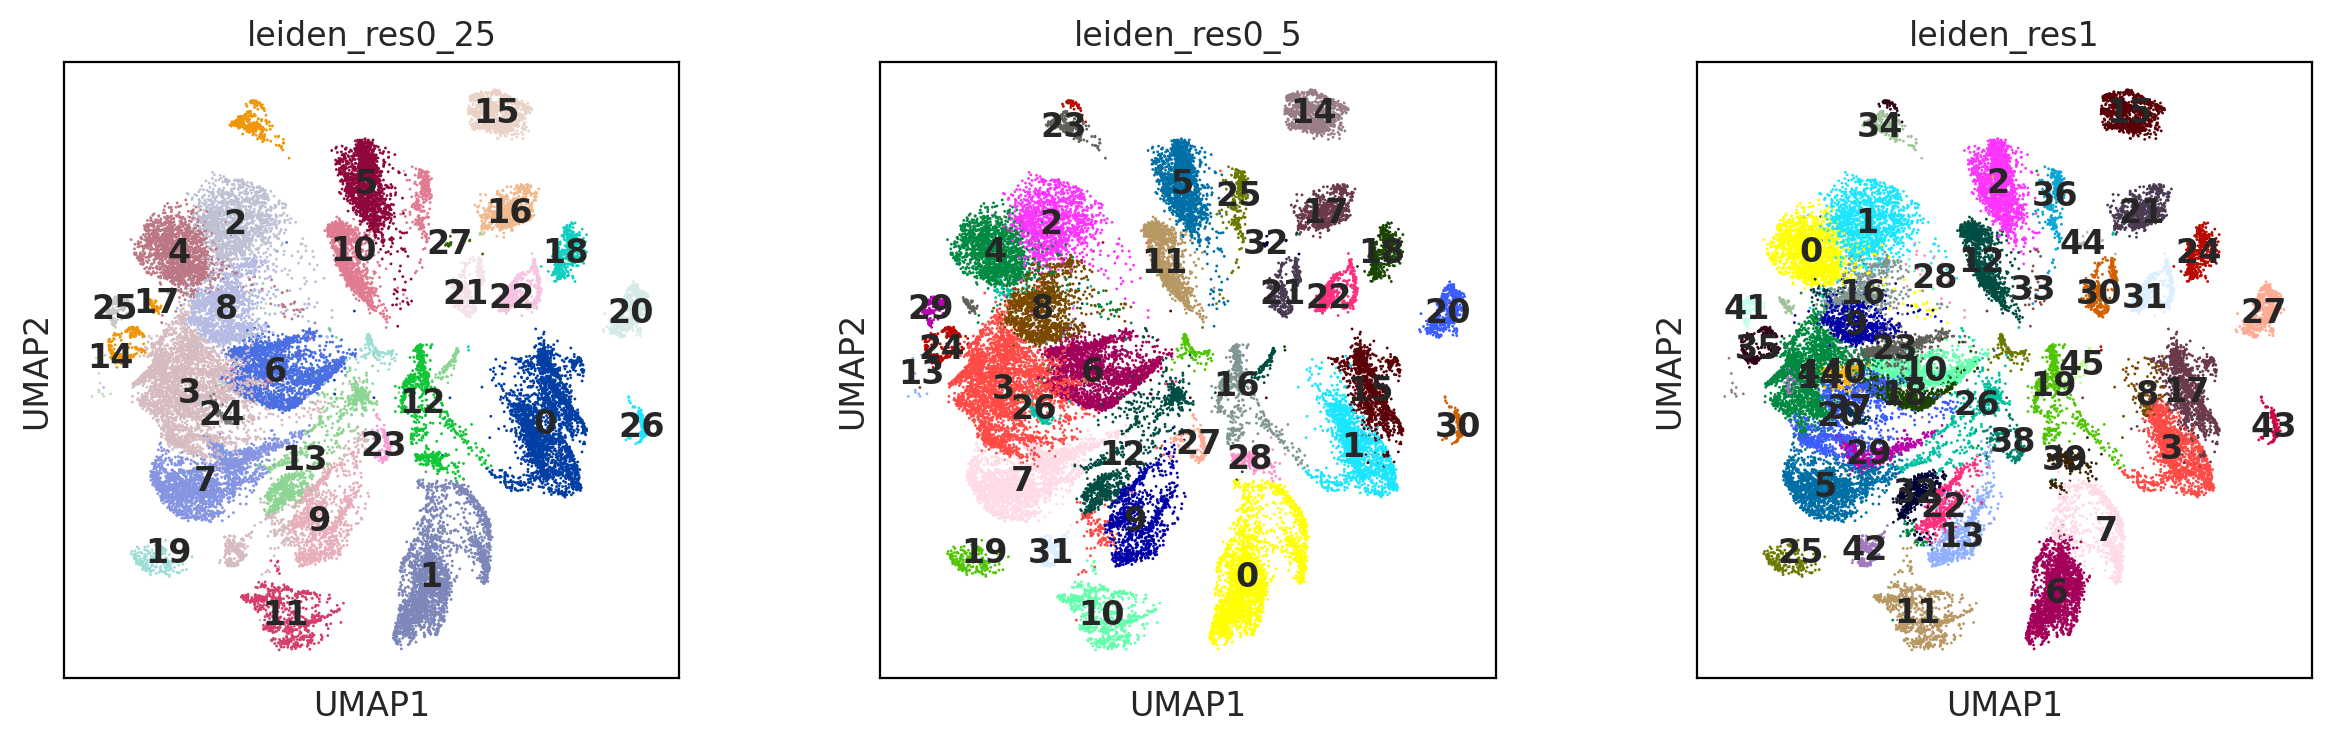